In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import signal

In [37]:
DX = 0.001
MU = 0
SIG = 1
MINV = -5
MAXV = 10

def conv(f,g):
    N = int(len(f)/2)
    z = np.zeros([N])
    f = np.concatenate((f,z))
    g = np.concatenate((g,z))
    ft = np.fft.fft(f)
    gt = np.fft.fft(g)
    
    y_new = np.real(np.fft.ifft(ft*gt))
    return (y_new/max(y_new)).real
    
#Defining a gaussian function to shift
def gauss(x,mu,sig):
    return (np.exp(-(x-mu)**2/(2*sig**2)))

#Making the gaussian array
x_val = np.arange(MINV,MAXV,DX)
g = gauss(x_val,MU,SIG)
y = 3*x_val
t = np.ones([len(x_val)])*0.5
cos = np.cos(x_val)
c = conv(g,cos)

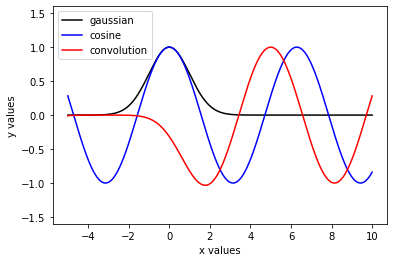

In [39]:
plt.plot(x_val,g,label='gaussian',color='black')
plt.plot(x_val,cos,label='cosine',color='blue')
plt.plot(x_val,c[:len(x_val)],label='convolution',color='red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.ylim(-1.6,1.6)
plt.legend()
plt.savefig('q4_no_wrapping_cos')
plt.show()

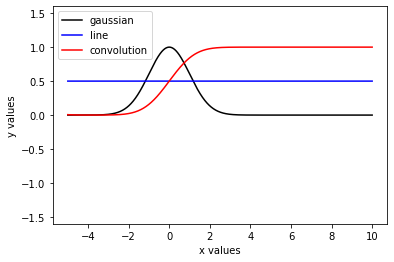

In [41]:
c = conv(g,t)
plt.plot(x_val,g,label='gaussian',color='black')
plt.plot(x_val,t,label='line',color='blue')
plt.plot(x_val,c[:len(x_val)],label='convolution',color='red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.ylim(-1.6,1.6)
plt.legend()
plt.savefig('q4_no_wrapping_line')
plt.show()

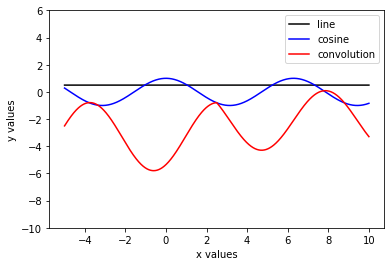

In [45]:
c = conv(cos,t)
plt.plot(x_val,t,label='line',color='black')
plt.plot(x_val,cos,label='cosine',color='blue')
plt.plot(x_val,c[:len(x_val)],label='convolution',color='red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.ylim(-10,6)
plt.legend()
plt.savefig('q4_no_wrapping_cos_line')
plt.show()